In [1]:
import os 
import sys
import torch
import numpy as np
from scr.lattice import Lattice
from scr.random_walk import RandomWalk
from scr.simulation import Simulation
from scr.hard_spheres import HardSpheres
from scr.utils import make_video,run_hardspheres
from tqdm import tqdm 

<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


## HARD SPHERES

In [2]:
simu_name = "plot_hardspheres"
os.mkdir(simu_name)
os.mkdir(simu_name + "/frames")

### Initialize

not good: 274.0
not good: 207.0
not good: 146.0
not good: 122.0
not good: 94.0
not good: 76.0
not good: 61.0
not good: 53.0
not good: 48.0
not good: 40.0
not good: 36.0
not good: 29.0
not good: 27.0
not good: 25.0
not good: 23.0
not good: 17.0
not good: 15.0
not good: 15.0
not good: 14.0
not good: 13.0
not good: 12.0
not good: 12.0
not good: 10.0
not good: 9.0
not good: 9.0
not good: 8.0
not good: 7.0
not good: 6.0
not good: 6.0
not good: 5.0
not good: 5.0
not good: 5.0
not good: 5.0
not good: 4.0
not good: 4.0
not good: 4.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 3.0
not good: 2.0
not good: 1.0
not good: 1.0


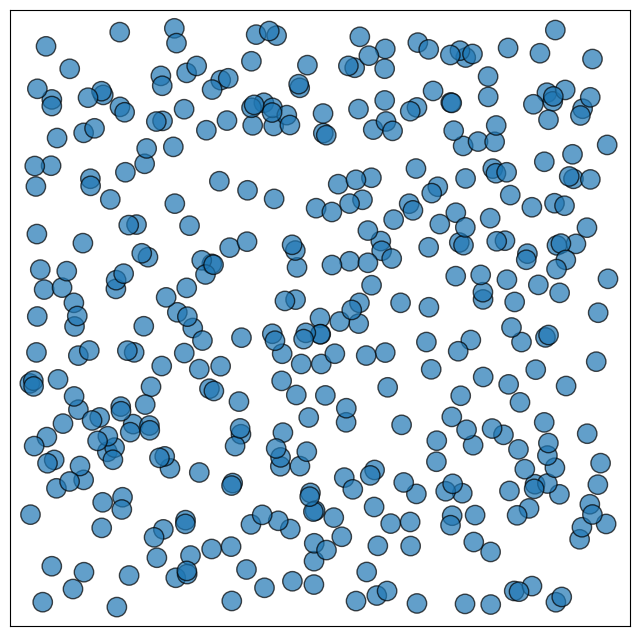

In [3]:
N = int(800/2)
L = 10
# pos = L*torch.rand(N,2)
vel = 0.15*torch.randn(N,2)

# R = 0.05
# R = 0.125 * torch.ones(N) * 1.42
R = 0.125 * torch.ones(N) * 1.25
R0 = torch.max(R).item()
pos = torch.tensor([[L/2,L/2]]) + (L/2 - 2*R0)*(torch.rand(N,2) - 0.5)*2
pos[0,0] = L/2
pos[0,1] = L/2

simu = HardSpheres(pos,vel,R,L,[1,1],0.001)
# Unfortunately, the initial configuration is likely bad so resample until it is good
is_good, col_index = simu.good_config()
resample = torch.ones(N)
while ~is_good:
    resample = resample * (col_index>=0)
    resample[0] = 0.0
    M = resample.sum()
    print(f"not good: " + str(M.item()))
    simu.pos[resample.bool(),:] = torch.tensor([[L/2,L/2]]) + (L/2 - R0)*(torch.rand(M.int(),2) - 0.5)*2
    is_good, col_index = simu.good_config()
    
t_iter = 0

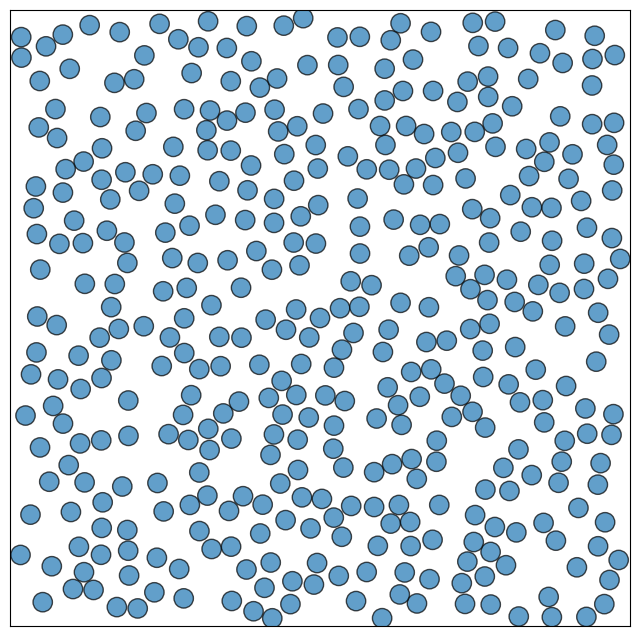

In [4]:
simu.update_plot()
simu.fig

### Step 1: Run vanilla

In [5]:
T = 30.0
plot_every = 0.018 * 4
t_iter, extra = run_hardspheres(simu,T,t_iter,plot_every,simu_name)

Progress:100%

### Step 2: Pause and highlight one

In [6]:
for _ in tqdm(range(60)):
    simu.fig.savefig(simu_name + "/frames/" + f"{t_iter}.png")
    t_iter += 1


fcolors = ["tab:blue"]*simu.N
fcolors[0] = "tab:orange"
op = 0.3*np.ones(simu.N)
op[0] = 1.0
simu.hs_plot.set_facecolor(fcolors)
simu.hs_plot.set_alpha(op)
arrow = simu.ax.arrow(simu.pos[0,0]-2,simu.pos[0,1]-2,1,1,width=0.3,facecolor='tab:orange',edgecolor='k')

for _ in tqdm(range(100)):
    simu.fig.savefig(simu_name + "/frames/" + f"{t_iter}.png")
    t_iter += 1
    
arrow.remove()


100%|██████████| 100/100 [00:06<00:00, 15.56it/s]


### Step 3: Resume simulation 

In [7]:
T += 120
plot_every = 0.018 * 9
plot_traj = True
t_iter, extra = run_hardspheres(simu,T,t_iter,plot_every,simu_name,record_traj=True,plot_traj=plot_traj)

Progress:100%

### Step 4: Show trajectory

In [8]:
traj_plot = simu.ax.plot(extra['traj']['x'],extra['traj']['y'],color='k',linewidth=1.8)

for _ in tqdm(range(100)):
    simu.fig.savefig(simu_name + "/frames/" + f"{t_iter}.png")
    t_iter += 1

100%|██████████| 100/100 [00:07<00:00, 14.00it/s]


### Final step

In [9]:
make_video(simu_name=simu_name,prefix="",video_name=simu_name)